In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
soildata=pd.read_csv('data.csv')
soildata.rename(columns = {'moisture':'Humidity'}, inplace = True)
soildata.rename(columns = {'temp':'Temperature'}, inplace = True)
soildata.rename(columns = {'pump':'Watering_Req'}, inplace = True)
print( 'Dataframe consits of :',soildata.shape)
soildata.head(5)

Dataframe consits of : (200, 4)


,crop,Humidity,Temperature,Watering_Req
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1


In [ ]:
soildata.describe()

,Humidity,Temperature,Watering_Req
count,200.000000,200.000000,200.000000
mean,633.085000,27.750000,0.750000
std,279.077118,10.869602,0.434099
min,4.000000,10.000000,0.000000
25%,500.500000,18.000000,0.750000
50%,693.500000,28.000000,1.000000
75%,850.750000,38.000000,1.000000
max,1022.000000,45.000000,1.000000


In [ ]:
soildata['Watering_Req'].value_counts()

1    150
0     50
Name: Watering_Req, dtype: int64

Text(0.5, 1.0, 'Distribution of water requirement')

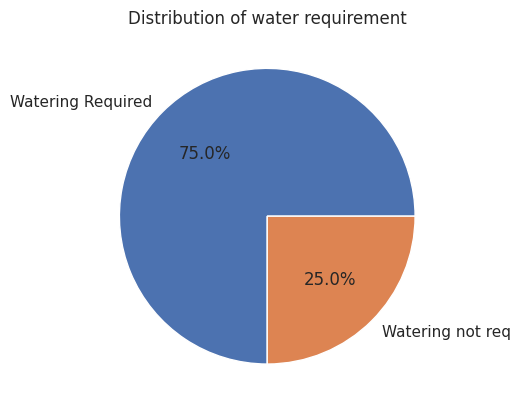

In [ ]:
labels=["Watering Required","Watering not req"]
y=np.array([150, 50])
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.title('Distribution of water requirement')

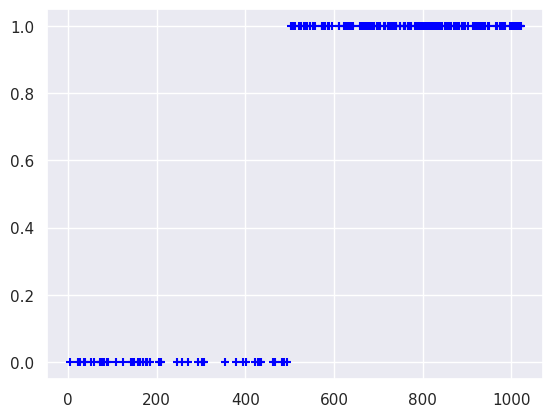

In [ ]:
plt.scatter(soildata.Humidity, soildata.Watering_Req, marker='+',color='blue')

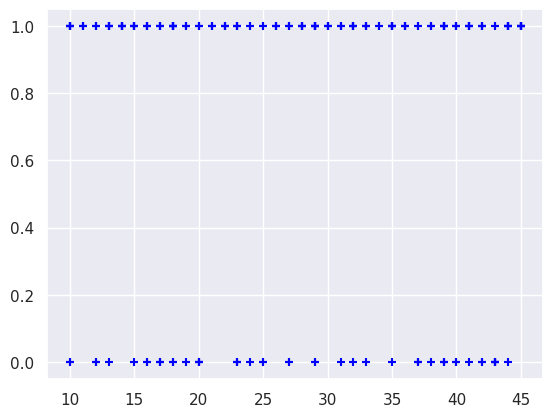

In [ ]:
plt.scatter(soildata.Temperature,soildata.Watering_Req,marker='+',color='blue')

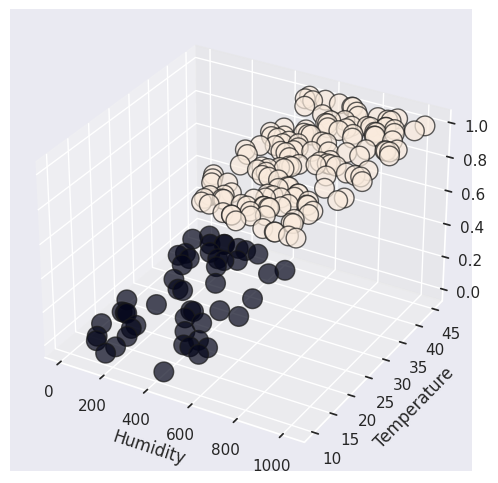

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(soildata.Humidity, soildata.Temperature, soildata.Watering_Req,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=soildata.Watering_Req)
plt.xlabel("Humidity")
plt.ylabel("Temperature")

plt.show()

<ipython-input-50-7beba81ddbe4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = soildata.corr()


              Humidity  Temperature  Watering_Req
Humidity      1.000000    -0.045969      0.854447
Temperature  -0.045969     1.000000     -0.019702
Watering_Req  0.854447    -0.019702      1.000000


<Axes: >

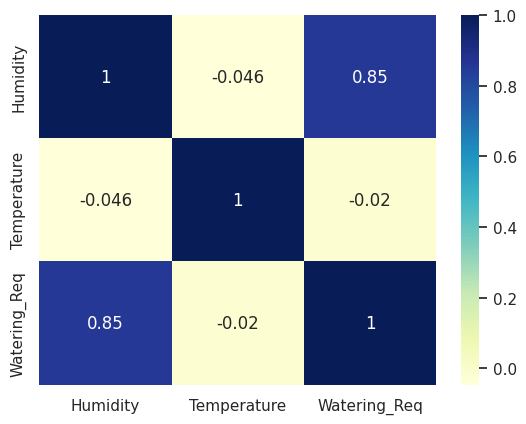

In [ ]:
cormat = soildata.corr()
print(cormat)
sns.heatmap(cormat, cmap="YlGnBu", annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = soildata.drop(['Watering_Req','crop'], axis=1)
y = soildata['Watering_Req']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.8,stratify=y, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear',random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

0.91875 : is the accuracy score
0.9349593495934959 : is the precision score
0.9583333333333334 : is the recall score
0.9465020576131687 : is the f1 score


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[115   5]
 [  8  32]]


Confusion matrix, without normalization
[[115   5]
 [  8  32]]


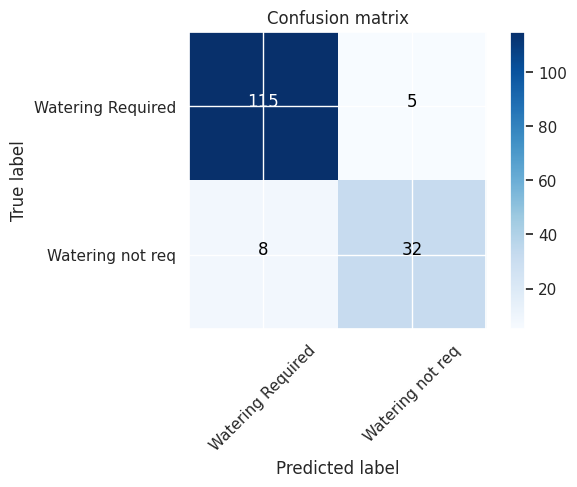

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Watering Required','Watering not req'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        40
           1       0.93      0.96      0.95       120

    accuracy                           0.92       160
   macro avg       0.90      0.88      0.89       160
weighted avg       0.92      0.92      0.92       160

